In [72]:
import os
import h5py
import math
import numpy as np
import torch
import scipy
import pathlib
from collections import defaultdict
from matplotlib import pyplot as plt

%matplotlib inline

In [73]:
def view_mri(data_dir, file_index=0, index=0, coil=0, max_col=4, figsize=(15, 4), show_real_imgag=False, save_location=None):
    file_names = os.listdir(data_dir)
    mri = h5py.File(os.path.join(data_dir, sorted(file_names)[file_index]))
    hf_attr = dict(mri.attrs)

    maps = {}
    for key in mri.keys():
        field = np.squeeze(mri[key])
        if len(field.shape)== 3:
            field = field[index, :, :]
        elif len(field.shape)>= 4:
            if len(field.shape) == 5:
                field = field[:, 0, ...]
            if abs(np.min(field) - np.max(field)) > 1.0:
                field = torch.softmax(torch.from_numpy(field), dim=1).numpy()
            field = [field[index, i, :, :] for i in range(field.shape[1])]
        
        if isinstance(field, (tuple, list)):
            for i in range(len(field)):
                maps[f"{key}_{i}"] = field[i]
        elif np.iscomplex(field).any():
            map = np.abs(field)
            if key == "kspace":
                map = np.log(map + 1e-9)
            maps[key] = map 
            if show_real_imgag:
                maps[f"{key}_real"] = np.real(field)
                maps[f"{key}_img"] = np.imag(field)
        else:
            maps[key] = field
    
    n_cols = min(max_col, len(maps.keys()))
    n_rows = math.ceil(len(maps.keys()) / n_cols)
    fig = plt.figure(figsize=figsize)
    for i, key in enumerate(maps.keys()):
        plt.subplot(n_rows, n_cols, i + 1)
        ax = plt.imshow(maps[key], cmap="gray")
        plt.colorbar(ax)
        plt.title(key)
    subtitle_str = ""
    for metric in hf_attr.keys():
        subtitle_str += f"{metric}: {hf_attr[metric][index]:0.5f}, "
    plt.suptitle(f"{file_index}: {sorted(file_names)[file_index]}, slice: {index}")
    # plt.figtext(s=subtitle_str, x=0.2, y=-0.03, )
    plt.tight_layout()
    if save_location:
        plt.savefig(save_location, bbox_inches='tight', dpi=300, format='png')
    plt.show()

def get_metrics(data_dir, index=None, slice_int=None, print_stats=True):
    results = {}
    
    if index is not None:
        files = [sorted(pathlib.Path(data_dir).glob("*.h5"))[index]]
    else:
        files = sorted(pathlib.Path(data_dir).glob("*.h5"))

    for f in files:
        input_path = f
        hf = h5py.File(input_path)
        hf_attr = dict(hf.attrs)

        for key, value in hf_attr.items():
            if key not in results:
                results[key] = list(value)
            else:
                results[key].extend(list(value))

    for key, value in results.items():
        metric_results = np.array(value)
        metric_results = np.mean(np.ma.masked_invalid(metric_results[metric_results > 0.0]))
        if print_stats:
            print(f"{key}: \t {metric_results}")
    if print_stats:        
        print("---------")
    return results

Zero-filled reconstruction

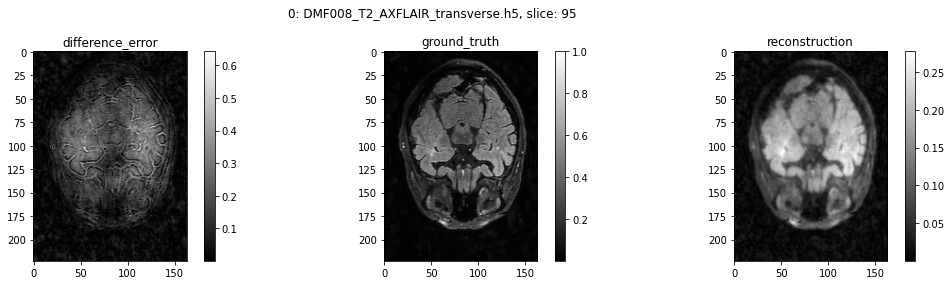

l1: 	 0.06218361894086753
loss: 	 0.06218361894086753
psnr: 	 21.363588543068428
ssim: 	 0.6667420826979464
---------


In [74]:
recon_results_dir = "/data/projects/tecfidera/data/results/reconstruction/zf/h5"
file_index = 0 #np.random.randint(0, len(os.listdir(recon_results_dir)))
slice_int = 95
coil = 0
view_mri(recon_results_dir, file_index=file_index, index=slice_int)
metric_result_dict = get_metrics(recon_results_dir)

PICS reconstruction

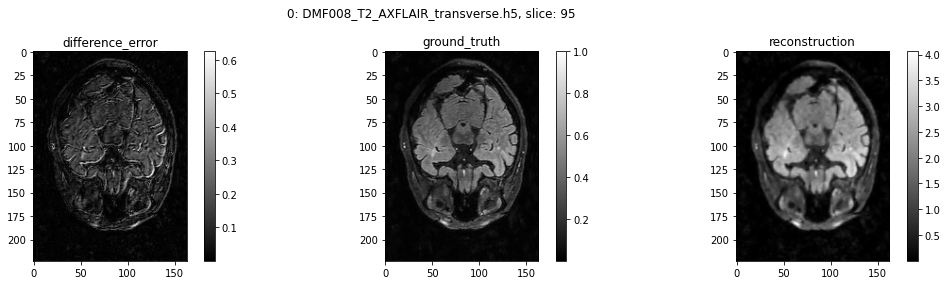

l1: 	 0.03600482370723484
loss: 	 0.03600482370723484
psnr: 	 25.467822615197086
ssim: 	 0.7146566352543163
---------


In [75]:
recon_results_dir = "/data/projects/tecfidera/data/results/reconstruction/pics/h5/"
file_index = 0 #np.random.randint(0, len(os.listdir(recon_results_dir)))
slice_int = 95
coil = 0
view_mri(recon_results_dir, file_index=file_index, index=slice_int)
metric_result_dict = get_metrics(recon_results_dir)

CIRIM_1_64F_poisson2d

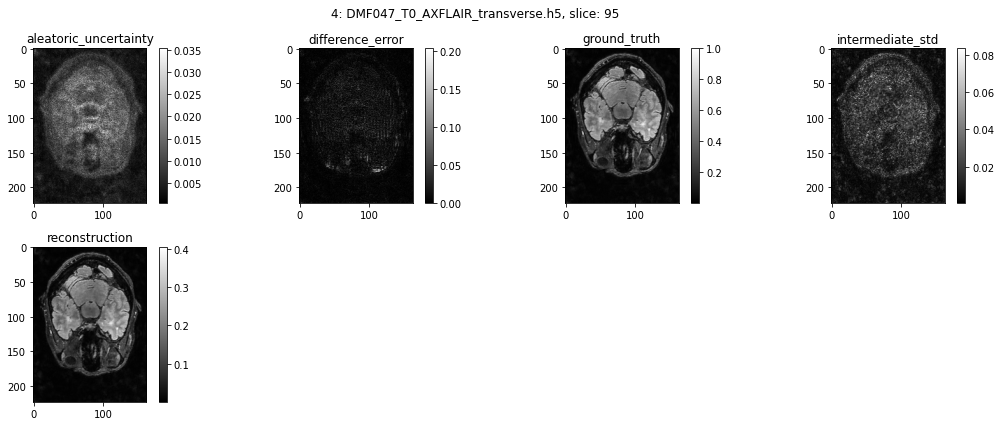

l1: 	 0.0035272989229779097
l1_std: 	 0.00016626880944563613
loss: 	 0.0035272989229779097
loss_std: 	 0.00016626880944563613
psnr: 	 39.93640629895311
psnr_std: 	 0.4113986396832061
ssim: 	 0.9766972303390502
ssim_std: 	 0.0008982269601483189
---------


In [76]:
recon_results_dir = "/data/projects/tecfidera/data/results/reconstruction/cirim_1c_64f_poisson2d/h5"
file_index = 4 #np.random.randint(0, len(os.listdir(recon_results_dir)))
slice_int = 95
coil = 0
view_mri(recon_results_dir, file_index=file_index, index=slice_int, figsize=(15, 6))
metric_result_dict = get_metrics(recon_results_dir)

CIRIM_4C_64f_poisson2d

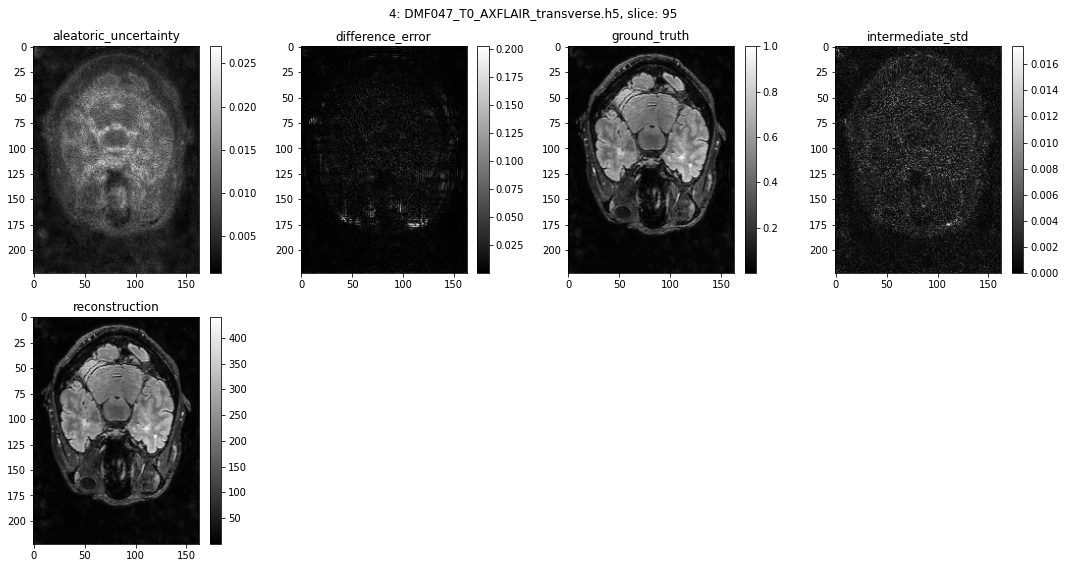

l1: 	 0.0025763045615660694
l1_std: 	 0.0002411684941573922
loss: 	 0.0025763045615660694
loss_std: 	 0.0002411684941573922
psnr: 	 41.875242376490256
psnr_std: 	 0.45000243585212363
ssim: 	 0.9853076380131867
ssim_std: 	 0.0025017515952522698
---------


In [79]:
recon_results_dir = "/data/projects/tecfidera/data/results/reconstruction/cirim_4c_64f_poisson2d/h5/"
file_index = 4
slice_int = 95
coil = 0
view_mri(recon_results_dir, file_index=file_index, index=slice_int, figsize=(15, 8))
metric_result_dict = get_metrics(recon_results_dir)

CIRIM_8C_64f_poisson2d

In [80]:
recon_results_dir = "/data/projects/tecfidera/data/results/reconstruction/cirim_8c_64f_poisson2d/"
file_index = 0
slice_int = 95
coil = 0
view_mri(recon_results_dir, file_index=file_index, index=slice_int, figsize=(15, 6))
metric_result_dict = get_metrics(recon_results_dir)

IsADirectoryError: [Errno 21] Unable to open file (file read failed: time = Fri Jun  3 16:14:38 2022
, filename = '/data/projects/tecfidera/data/results/reconstruction/cirim_8c_64f_poisson2d/h5', file descriptor = 59, errno = 21, error message = 'Is a directory', buf = 0x7ffd5d107ad8, total read size = 8, bytes this sub-read = 8, bytes actually read = 18446744073709551615, offset = 0)

In [82]:
seg_results_dir = "/data/projects/tecfidera/data/results/segmentation/unet_3.7/h5/"
file_index = 4
slice_int = 95
coil = 0
view_mri(seg_results_dir, file_index=file_index, index=slice_int, figsize=(15, 11))
metric_result_dict = get_metrics(seg_results_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/data/projects/tecfidera/data/results/segmentation/unet_3.7/h5/'

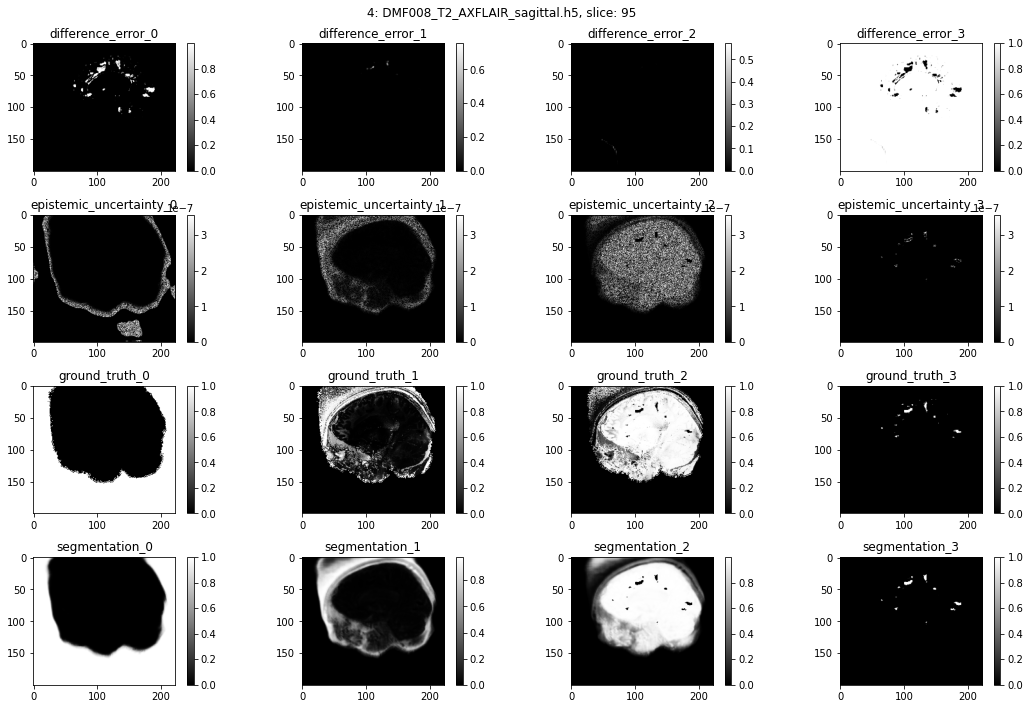

average_surface_distance: 	 1.2420534168352346
average_surface_distance_std: 	 0.8359627127988355
cross_entropy: 	 0.026600599787314046
cross_entropy_std: 	 8.7864253644289e-10
dice_background: 	 0.9891267366087432
dice_background_std: 	 2.8744825630576947e-08
dice_graymatter: 	 0.8266970296459868
dice_graymatter_std: 	 2.73865385428594e-08
dice_lesion: 	 0.7281907546869759
dice_lesion_std: 	 2.6316619725763493e-08
dice_loss: 	 0.2854399061193988
dice_loss_std: 	 9.508569846288335e-09
dice_score: 	 0.7846752746474982
dice_score_std: 	 2.6343822477762717e-08
dice_whitematter: 	 0.788069812475102
dice_whitematter_std: 	 2.6820590147893042e-08
f1_background: 	 0.9891267358275765
f1_background_std: 	 2.8891471419922055e-08
f1_graymatter: 	 0.8266970290333493
f1_graymatter_std: 	 2.741681339691323e-08
f1_lesion: 	 0.7281907553171804
f1_lesion_std: 	 2.6397481444268446e-08
f1_macro: 	 0.6623524808174508
f1_macro_std: 	 2.2777297531250715e-08
f1_micro: 	 0.8340239861360671
f1_micro_std: 	 2.8

In [ ]:
seg_results_dir = "/data/projects/tecfidera/data/results/segmentation/base_unet_7.8/h5/"
file_index = 4
slice_int = 95
coil = 0
view_mri(seg_results_dir, file_index=file_index, index=slice_int, figsize=(15, 10))
metric_result_dict = get_metrics(seg_results_dir)

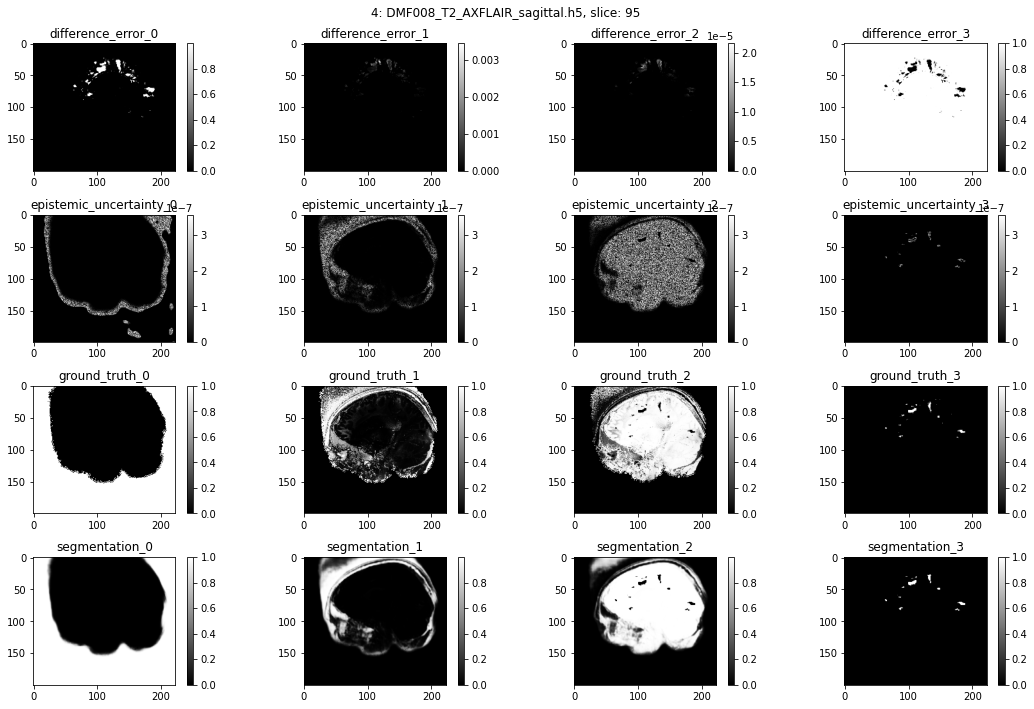

average_surface_distance: 	 1.0532474437045491
average_surface_distance_std: 	 0.9983135237493708
cross_entropy: 	 0.0232652526292396
cross_entropy_std: 	 7.676999222439482e-10
dice_background: 	 0.9896771396695425
dice_background_std: 	 2.8860406697788874e-08
dice_graymatter: 	 0.8421963405907569
dice_graymatter_std: 	 2.844129767938794e-08
dice_lesion: 	 0.757836236837573
dice_lesion_std: 	 2.7026290072874618e-08
dice_loss: 	 0.24395848270594497
dice_loss_std: 	 8.238336202147353e-09
dice_score: 	 0.8096002401690525
dice_score_std: 	 0.037621167888253065
dice_whitematter: 	 0.7883000430174495
dice_whitematter_std: 	 2.6533046492942244e-08
f1_background: 	 0.9896765386354877
f1_background_std: 	 3.023488494240209e-08
f1_graymatter: 	 0.8348101302913926
f1_graymatter_std: 	 2.9100696315800193e-08
f1_lesion: 	 0.7203440372860089
f1_lesion_std: 	 2.5833653794013082e-08
f1_macro: 	 0.6817075553030039
f1_macro_std: 	 2.342726114394258e-08
f1_micro: 	 0.8404903006286899
f1_micro_std: 	 2.91

In [ ]:
seg_results_dir = "/data/projects/tecfidera/data/results/segmentation/base_lambdaunet_3.7/h5/"
file_index = 4
slice_int = 95
coil = 0
view_mri(seg_results_dir, file_index=file_index, index=slice_int, figsize=(15, 10))
metric_result_dict = get_metrics(seg_results_dir)

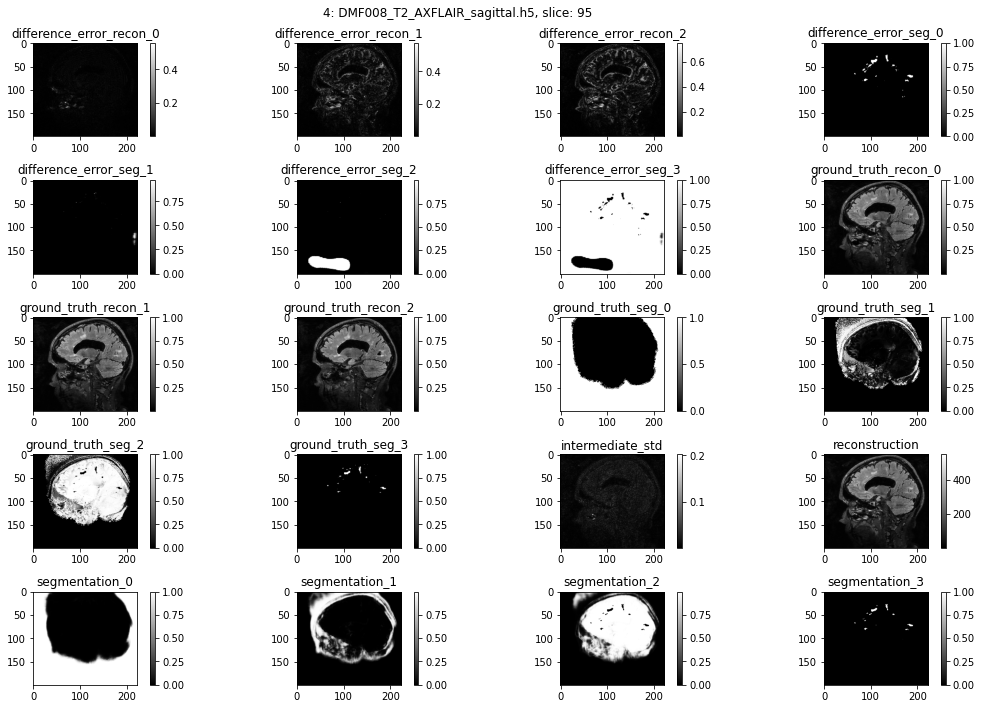

average_surface_distance: 	 1.1203210895629974
cross_entropy: 	 0.11335639424424106
dice_background: 	 0.9882818013141195
dice_graymatter: 	 0.8284006582921343
dice_lesion: 	 0.7493272010509775
dice_loss: 	 0.20431018689271246
dice_score: 	 0.7956898464977641
dice_whitematter: 	 0.7746686595078307
f1_background: 	 0.9882854994384992
f1_graymatter: 	 0.8214424199100079
f1_lesion: 	 0.7100020447764898
f1_macro: 	 0.6700206618670802
f1_micro: 	 0.8275613259977143
f1_weighted: 	 0.8276872302580874
f1_whitematter: 	 0.768627455477111
hausdorff_distance: 	 9.985926941170105
l1: 	 0.0029601071958672
loss: 	 0.0032512581487117026
precision_background: 	 0.9901461468687179
precision_graymatter: 	 0.8054610944454372
precision_lesion: 	 0.7010599476908093
precision_macro: 	 0.6681186804751036
precision_micro: 	 0.8211044966163455
precision_weighted: 	 0.8234983470454018
precision_whitematter: 	 0.7851358966688103
psnr: 	 41.227161464790846
recall_background: 	 0.9865270579306599
recall_graymatter

In [ ]:
seg_results_dir = "/data/projects/tecfidera/data/results/srs/recseg/h5/"
file_index = 4
slice_int = 95
coil = 0
view_mri(seg_results_dir, file_index=file_index, index=slice_int, figsize=(15, 10))
metric_result_dict = get_metrics(seg_results_dir)

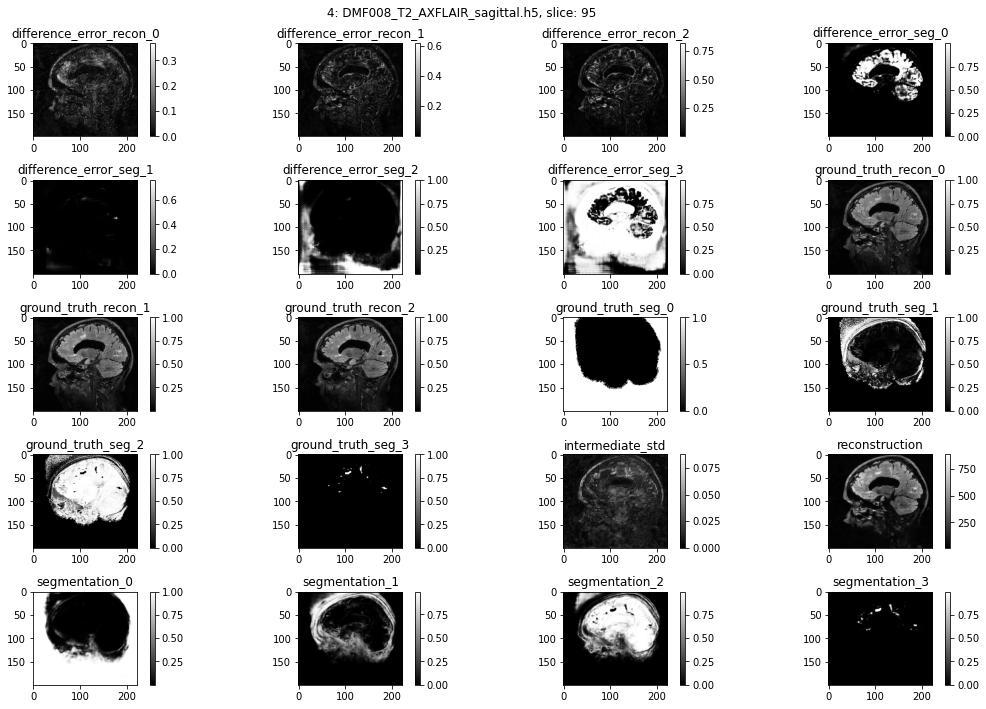

average_surface_distance: 	 2.6712635776966978
cross_entropy: 	 0.12536860974345423
dice_background: 	 0.9820741806621752
dice_graymatter: 	 0.7514287676351227
dice_lesion: 	 0.47612135525246463
dice_loss: 	 0.6470812613694032
dice_score: 	 0.3529187844617632
dice_whitematter: 	 0.692645958055385
f1_background: 	 0.9820757495603342
f1_graymatter: 	 0.7472760893687277
f1_lesion: 	 0.4565023240680496
f1_macro: 	 0.5287312517187239
f1_micro: 	 0.7455222800150272
f1_weighted: 	 0.7426236222163902
f1_whitematter: 	 0.6892882278172524
hausdorff_distance: 	 14.662488220548175
l2: 	 0.0008127587155742654
loss: 	 0.0008140042630728698
precision_background: 	 0.9741046053582224
precision_graymatter: 	 0.7679738223774032
precision_lesion: 	 0.5456637188456953
precision_macro: 	 0.5792057989416669
precision_micro: 	 0.7874357516220536
precision_weighted: 	 0.7896679928103103
precision_whitematter: 	 0.7869668538215768
psnr: 	 27.703832732489282
recall_background: 	 0.9909404537972363
recall_grayma

In [ ]:
seg_results_dir = "/data/projects/tecfidera/data/results/srs/idslr/h5/"
file_index = 4
slice_int = 95
coil = 0
view_mri(seg_results_dir, file_index=file_index, index=slice_int, figsize=(15, 10))
metric_result_dict = get_metrics(seg_results_dir)

Metric Plot

In [ ]:
cirim_1c_dir = "/data/projects/tecfidera/data/results/reconstruction/cirim_1c_64f_poisson2d/h5/"
cirim_4c_dir = "/data/projects/tecfidera/data/results/reconstruction/cirim_4c_64f_poisson2d/h5/"
cirim_8c_dir = "/data/projects/tecfidera/data/results/reconstruction/cirim_8c_64f_poisson2d/h5/"
zf_dir = "/data/projects/tecfidera/data/results/reconstruction/zf/h5/"
pics_dir = "/data/projects/tecfidera/data/results/reconstruction/pics/h5/"

lambdaunet_dir = "/data/projects/tecfidera/data/results/segmentation/base_lambdaunet_3.6/h5/"
unet_small_dir = "/data/projects/tecfidera/data/results/segmentation/base_unet_3.7/h5/"
unet_dir = "/data/projects/tecfidera/data/results/segmentation/base_unet_7.8/h5/"

recseg_dir = "/data/projects/tecfidera/data/results/srs/recseg/h5/"
idslr_dir = "/data/projects/tecfidera/data/results/srs/idslr/h5/"

model_results_dir = [cirim_1c_dir, cirim_4c_dir, cirim_8c_dir, zf_dir, pics_dir, lambdaunet_dir, unet_small_dir, unet_dir, idslr_dir, recseg_dir]
target_metrics = ["psnr", "ssim", "dice_score", "dice_background", "dice_graymatter", "dice_lesion", "dice_whitematter"]

In [ ]:
import yaml
results_dict = {}
for dir in model_results_dir:
    model_name = dir.split("/")[-3]
    results_metric_dict = {}
    for metric in target_metrics:
        metric_dict = get_metrics(dir, print_stats=False)
        if metric in metric_dict.keys():
            metric_results = np.array(metric_dict[metric])
            metric_results_mean = np.mean(np.ma.masked_invalid(metric_results[metric_results > 0.0]))
            metric_results_std = np.std(np.ma.masked_invalid(metric_results[metric_results > 0.0]))
            results_metric_dict[metric] = float(metric_results_mean)
            results_metric_dict[f"{metric}_std"] = float(metric_results_std)
    results_dict[model_name] = results_metric_dict
print(yaml.dump(results_dict, allow_unicode=True, default_flow_style=False))

base_lambdaunet_3.6:
  dice_background: 0.9896771396695425
  dice_background_std: 0.007771692480373526
  dice_graymatter: 0.8421963405907569
  dice_graymatter_std: 0.1051446513433165
  dice_lesion: 0.757836236837573
  dice_lesion_std: 0.18486628011559197
  dice_score: 0.8096002401690525
  dice_score_std: 0.12975611435865478
  dice_whitematter: 0.7883000430174495
  dice_whitematter_std: 0.20807372616151046
base_unet_3.7:
  dice_background: 0.9887387212117513
  dice_background_std: 0.008640579910154534
  dice_graymatter: 0.8224442651022266
  dice_graymatter_std: 0.11448394967008785
  dice_lesion: 0.7131947739465658
  dice_lesion_std: 0.19463189896667962
  dice_score: 0.7773360231910911
  dice_score_std: 0.16306906448718453
  dice_whitematter: 0.7833790536100665
  dice_whitematter_std: 0.18475939302617536
base_unet_7.8:
  dice_background: 0.9891267366087432
  dice_background_std: 0.00832066448939886
  dice_graymatter: 0.8266970296459868
  dice_graymatter_std: 0.11498342649910462
  dice_le